## Method of Least Square Fitting

### Problem Statement:

We are supposed to fit a given dataset with variables $x$ and $y$ in the following form:

$$y = a \cdot b^{-x}$$

where $a$ and $b$ are constants to be determined.

### Solution Approach:

To linearize the model, we take the natural logarithm:

$$\ln y = \ln a - x \ln b$$

Let:
- $Y = \ln y$
- $A = \ln a$
- $B = \ln b$

This gives a linear relation:

$$Y = A - Bx$$

This is now a simple linear regression problem. We are fitting the data $(x, Y)$ to the straight-line model:

$$Y = A + (-B)x$$

To determine the best-fit values of $A$ and $B$, we use the **Method of Least Square**. We define the error between the actual and predicted values as:

$$
E = \sum_{i=1}^{n} \left( Y_i - (A - B x_i) \right)^2
$$

To minimize the error $E$, we take partial derivatives with respect to $A$ and $B$ and set them to zero:

1. Derivative with respect to $A$:
$$
\frac{\partial E}{\partial A} = -2 \sum \left( Y_i - A + B x_i \right) = 0
\Rightarrow \sum Y = nA - B \sum x
$$

2. Derivative with respect to $B$:
$$
\frac{\partial E}{\partial B} = 2 \sum x_i \left( Y_i - A + B x_i \right) = 0
\Rightarrow \sum xY = A \sum x - B \sum x^2
$$

Thus, we obtain the system of linear equations:

$$
\begin{aligned}
nA - B \sum x &= \sum Y \\
A \sum x - B \sum x^2 &= \sum xY
\end{aligned}
$$

Once $A$ and $B$ are known, we retrieve the original parameters:

$$
a = e^A, \quad b = e^B
$$

and reconstruct the fitted exponential model:

$$
y = a \cdot b^{-x}
$$

Finally, we evaluate and plot this model along with the original data for visualization.

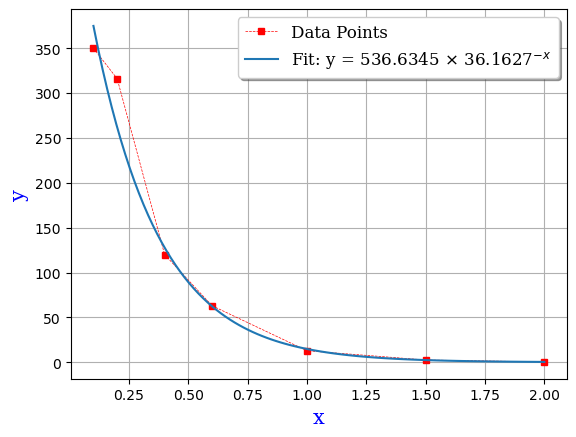

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = [0.1, 0.2, 0.4, 0.6, 1, 1.5, 2]
y = [350, 316, 120, 63, 12.86, 2.57, 0.425]
Y = [np.log(i) for i in y]

sum_x = sum(x)
sum_x2 = sum(i**2 for i in x)
sum_xY = sum(i * j for i, j in zip(x, Y))
sum_Y = sum(Y)

M = np.array([[len(x), -sum_x], [sum_x, -sum_x2]])
C = np.array([sum_Y, sum_xY])

m1 = M.copy()
m1[:, 0] = C

m2 = M.copy()
m2[:, 1] = C

A = np.linalg.det(m1) / np.linalg.det(M)
B = np.linalg.det(m2) / np.linalg.det(M)

a = np.exp(A)
b = np.exp(B)

x_new = np.linspace(0.1, 2, 100)
y_fit = [a * b**-i for i in x_new]

plt.plot(x, y, 's--', color='red', lw=0.5, ms=5, label='Data Points')
plt.plot(x_new, y_fit, label=f"Fit: y = {a:.4f} $\\times$ {b:.4f}$^{{-x}}$")
plt.xlabel('x', fontdict={'family':'serif', 'color':'blue', 'fontsize':15})
plt.ylabel('y', fontdict={'family':'serif', 'color':'blue', 'fontsize':15})
plt.legend(shadow=True, prop={'family':'serif', 'size':12})
plt.grid()
plt.show()